## Lab Assignment 3
### Data Mining 7331 Section 403
---
- Brian Coari
- Stephen Merritt
- Cory Thigpen
- Quentin Thomas

## Business Understanding 
---
- Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). How will you measure the effectiveness of a good algorithm? Why does your chosen validation method make sense for this specific dataset and the stakeholders needs? (10 points)

## Data Understanding 
---
- Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file. Verify data quality: Are there missing values? Duplicate data? Outliers? Are those mistakes? How do you deal with these problems? (10 pts)
- Visualize the any important attributes appropriately. Important: Provide an interpretation for any charts or graphs. (10 pts)

In [1]:
import numpy as np
import pandas as pd
#Create X and y vectors for sklearn pre-processing steps
df = pd.read_csv('data/pop_merge.csv')

#Remove years before 1992, which is the year of the split between Winter and Summer Olympics
df = df.loc[df['Year'] >= 2010]

y=df['Sport']
X=df.drop(['Sport', 'Unnamed: 0','Event'], axis = 1)

print(X.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35807 entries, 17 to 266821
Data columns (total 11 columns):
Country            35807 non-null object
Sex                35807 non-null int64
Age                35807 non-null int64
Height             35807 non-null int64
Weight             35807 non-null int64
Year               35807 non-null int64
Season             35807 non-null int64
BMI                35807 non-null float64
Population_Prop    35807 non-null float64
Medal              35807 non-null int64
Previous_Medals    35807 non-null int64
dtypes: float64(2), int64(8), object(1)
memory usage: 3.3+ MB
None


In [2]:
X = pd.get_dummies(X, columns = ['Country', 'Season','Sex'])

In [3]:
X = X[['Age', 'Height', 'Weight', 'Year', 'BMI', 'Population_Prop', 'Country_USA', 'Season_0', 'Season_1', 'Sex_0', 'Sex_1']]
print(X.describe())
print(y.describe())

                Age        Height        Weight          Year           BMI  \
count  35807.000000  35807.000000  35807.000000  35807.000000  35807.000000   
mean      26.081688    175.810233     70.931633   2013.550423     22.737934   
std        5.448576     10.832348     15.057773      2.174165      3.058872   
min       13.000000    133.000000     30.000000   2010.000000     10.503834   
25%       22.000000    168.000000     60.000000   2012.000000     20.761246   
50%       25.000000    175.000000     69.000000   2014.000000     22.395413   
75%       29.000000    183.000000     80.000000   2016.000000     24.221453   
max       71.000000    221.000000    214.000000   2016.000000     63.901580   

       Population_Prop   Country_USA      Season_0      Season_1  \
count     35807.000000  35807.000000  35807.000000  35807.000000   
mean          0.015858      0.059095      0.259502      0.740498   
std           0.034539      0.235805      0.438368      0.438368   
min           0.

In [4]:
print('There are %d unique sports in y: ' % len(y.unique()))
print(y.unique())

There are 49 unique sports in y: 
['Athletics' 'Taekwondo' 'Judo' 'Boxing' 'Weightlifting' 'Swimming'
 'Shooting' 'Alpine Skiing' 'Football' 'Volleyball' 'Sailing' 'Wrestling'
 'Rowing' 'Gymnastics' 'Fencing' 'Cross Country Skiing' 'Cycling'
 'Snowboarding' 'Biathlon' 'Handball' 'Basketball' 'Canoeing' 'Hockey'
 'Equestrianism' 'Rugby Sevens' 'Tennis' 'Beach Volleyball' 'Golf' 'Luge'
 'Modern Pentathlon' 'Table Tennis' 'Synchronized Swimming' 'Triathlon'
 'Water Polo' 'Archery' 'Diving' 'Freestyle Skiing'
 'Short Track Speed Skating' 'Skeleton' 'Badminton' 'Trampolining'
 'Speed Skating' 'Figure Skating' 'Bobsleigh' 'Rhythmic Gymnastics'
 'Ice Hockey' 'Nordic Combined' 'Ski Jumping' 'Curling']


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_enc=le.fit_transform(y)
print(y_enc)
print(le.classes_)

[ 2 41 24 ... 29 29  2]
['Alpine Skiing' 'Archery' 'Athletics' 'Badminton' 'Basketball'
 'Beach Volleyball' 'Biathlon' 'Bobsleigh' 'Boxing' 'Canoeing'
 'Cross Country Skiing' 'Curling' 'Cycling' 'Diving' 'Equestrianism'
 'Fencing' 'Figure Skating' 'Football' 'Freestyle Skiing' 'Golf'
 'Gymnastics' 'Handball' 'Hockey' 'Ice Hockey' 'Judo' 'Luge'
 'Modern Pentathlon' 'Nordic Combined' 'Rhythmic Gymnastics' 'Rowing'
 'Rugby Sevens' 'Sailing' 'Shooting' 'Short Track Speed Skating'
 'Skeleton' 'Ski Jumping' 'Snowboarding' 'Speed Skating' 'Swimming'
 'Synchronized Swimming' 'Table Tennis' 'Taekwondo' 'Tennis'
 'Trampolining' 'Triathlon' 'Volleyball' 'Water Polo' 'Weightlifting'
 'Wrestling']


In [6]:
from sklearn.preprocessing import StandardScaler
#Standardize X
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=10, test_size = 0.2, random_state=0)
for train_index, test_index in sss.split(X_std, y_enc):
    X_train, X_test = X_std[train_index], X_std[test_index]
    y_train, y_test = y_enc[train_index], y_enc[test_index]

## Modeling and Evaluation
---
Different tasks will require different evaluation methods. Be as thorough as possible when analyzing the data you have chosen and use visualizations of the results to explain the performance and expected outcomes whenever possible. Guide the reader through your analysis with plenty of discussion of the results. Each option is broken down by:
- Train and adjust parameters (10 pts)
- Evaluate and Compare (10 pts)
- Visualize Results (10 pts)
- Summarize the Ramifications (20 pts)

Cluster Analysis
- Train: Perform cluster analysis using several clustering methods (adjust parameters).
- Eval: Use internal and/or external validation measures to describe and compare the clusterings and the clusters— how did you determine a suitable number of clusters for each method?
- Visualize: Use tables/visualization to discuss the found results. Explain each visualization in detail.
- Summarize: Describe your results. What findings are the most interesting and why?

In [8]:
#This function was taken from Dr. Jake Drew's EducationDataNC Repository and modified for use in this project
cv = StratifiedShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)
from sklearn.model_selection import cross_validate

def EvaluateClassifierEstimator(classifierEstimator, X, y, cv):
   
    #Perform cross validation using f1_weighted to decrease the impact of imbalanced classes in the target
    scores = cross_validate(classifierEstimator, X, y, scoring=['accuracy','f1_weighted']
                            , cv=cv, return_train_score=True)

    Accavg = scores['test_accuracy'].mean()
    F1avg = scores['test_f1_weighted'].mean()

    print_str = "The average accuracy for all cv folds is: \t\t\t {Accavg:.5}"
    print_str4 = "The average F1 for all cv folds is: \t\t\t {F1avg:.5}"
    
    print(print_str.format(Accavg=Accavg))
    print(print_str4.format(F1avg=F1avg))
    print('*********************************************************')

    print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['Accuracy'] = scores['test_accuracy']
    scoresResults['F1'] = scores['test_f1_weighted']
    
    print(scoresResults)

In [9]:
from sklearn import metrics as mt
def per_class_accuracy(ytrue, yhat):
    conf = mt.confusion_matrix(ytrue, yhat)
    norm_conf = conf.diagonal() / conf.sum(axis=1)
    return norm_conf

def plot_class_acc(ytrue, yhat, title=''):
    acc_list = per_class_accuracy(ytrue, yhat)
    plt.bar(le.classes_, acc_list)
    plt.xlabel('Class value (One per Sport)')
    plt.ylabel('Accuracy within class')
    plt.title(title+", Total Acc=%.1f"%(100*mt.accuracy_score(ytrue,yhat)))
    plt.xticks(rotation = 'vertical')
    plt.grid()
    plt.ylim([0,1])
    plt.show()

In [10]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# Perform Grid Search to tune Hyperparamters of a Random Forest Classifier
# Determine best number of estimators
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)]
# Max depth
max_depth =[10, 20, 50]
# Number of features to consider at every split
max_features = ['log2', 'sqrt']
# Minimum number of samples required at each leaf node
min_samples_leaf = [5, 10, 20]
# Creating the grid
param_grid = {'n_estimators' : n_estimators,
              'max_features': max_features,
              'max_depth' : max_depth,
              'min_samples_leaf': min_samples_leaf
              }

rf = RandomForestClassifier(random_state = 0, class_weight = 'balanced')
rfGS = GridSearchCV(estimator = rf, 
                    n_jobs = -1,
                    verbose = 1,
                    param_grid = param_grid, 
                    cv = 3,
                    scoring = 'accuracy')


#Perform hyperparameter search to find the best combination of parameters for our data
rfGS.fit(X_train, y_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


/Users/Steve/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 31.0min finished


CPU times: user 31.3 s, sys: 2.02 s, total: 33.3 s
Wall time: 31min 30s


In [11]:
rfGS.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=50, max_features='log2',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1100, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [12]:
%%time
# Perform Stratifed 10-fold cross-validation on the Random Forest Model
rf_clf = rfGS.best_estimator_

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 6.91 µs


The Random Forest accuracy is: 0.41


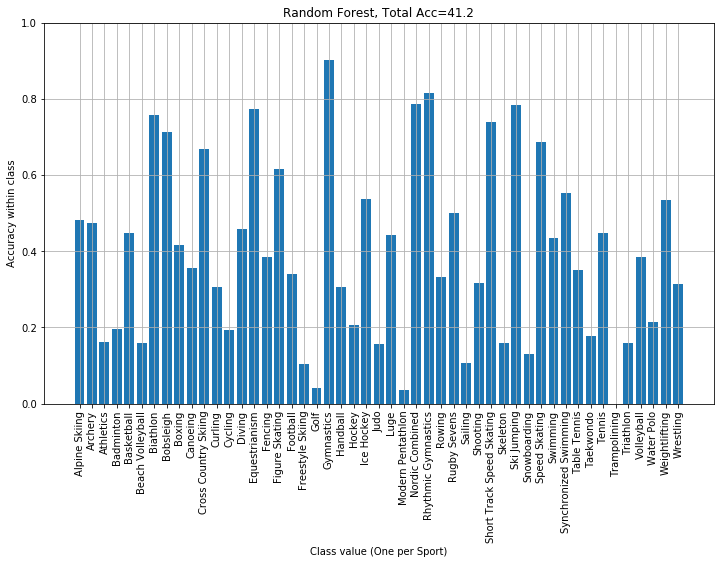

[0.48363636 0.475      0.16230366 0.1971831  0.44736842 0.15789474
 0.75886525 0.71428571 0.4159292  0.35672515 0.66778523 0.30555556
 0.19305019 0.45833333 0.77304965 0.38405797 0.61643836 0.34042553
 0.10344828 0.04166667 0.90322581 0.30714286 0.20645161 0.53757225
 0.15584416 0.44230769 0.03448276 0.78846154 0.81578947 0.33181818
 0.5        0.10738255 0.31674208 0.74074074 0.15789474 0.78378378
 0.13131313 0.68707483 0.43435981 0.55319149 0.35164835 0.17647059
 0.44736842 0.         0.15909091 0.38596491 0.21359223 0.53465347
 0.31386861]
CPU times: user 3.82 s, sys: 2.86 s, total: 6.68 s
Wall time: 7.75 s


In [40]:
%%time

from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 7)
from sklearn.metrics import classification_report

yhat = rf_clf.predict(X_test)
print('The Random Forest accuracy is: %.2f' % accuracy_score(y_test, yhat))

plot_class_acc(y_test, yhat, title='Random Forest')

print(per_class_accuracy(y_test, yhat))

In [14]:
%%time
EvaluateClassifierEstimator(rf_clf, X_std, y_enc, cv)

The average accuracy for all cv folds is: 			 0.41702
The average F1 for all cv folds is: 			 0.41321
*********************************************************
Cross Validation Fold Mean Error Scores
   Accuracy        F1
0  0.415387  0.412207
1  0.419715  0.414869
2  0.415526  0.412485
3  0.421949  0.416585
4  0.411338  0.409827
5  0.420413  0.415684
6  0.416923  0.410635
7  0.417760  0.415456
8  0.419436  0.416606
9  0.411756  0.407750
CPU times: user 21min 13s, sys: 38 s, total: 21min 51s
Wall time: 9min 16s


In [15]:
rf_clf_model = rf_clf.fit(X_train, y_train)

In [16]:
from sklearn.externals import joblib 
joblib.dump(rf_clf_model, 'rf_finalized.joblib')

['rf_finalized.joblib']

In [17]:
rf_clf_model = joblib.load('rf_finalized.joblib')

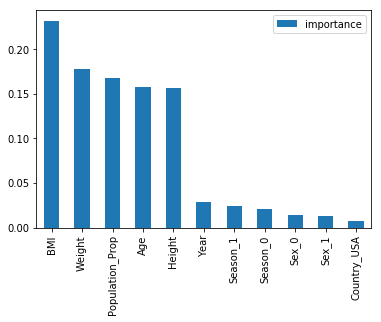

In [18]:
feature_importances = pd.DataFrame(rf_clf.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

feature_importances.head(30).plot(kind='bar')

In [19]:
def calc_zscore(df, cols):
    for col in cols:
        col_zscore = col + '_zscore'
        df[col_zscore] = (df[col] - df[col].mean())/df[col].std(ddof=0)
    return df.head()

In [20]:
X_BMI_Pop = X[['BMI', 'Population_Prop']]
X_BMI_Age = X[['BMI', 'Age']]
#Standardized data prior to plotting
cols_Pop = list(X_BMI_Pop.columns)
cols_Age = list(X_BMI_Age.columns)

In [21]:
calc_zscore(X_BMI_Pop, cols_Pop)

/Users/Steve/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,BMI,Population_Prop,BMI_zscore,Population_Prop_zscore
17,22.675737,0.004501,-0.020334,-0.328825
20,19.655451,0.004501,-1.007733,-0.328825
21,30.218858,0.004501,2.445682,-0.328825
35,20.312500,0.004501,-0.792929,-0.328825
36,22.052190,0.004501,-0.224185,-0.328825


In [22]:
calc_zscore(X_BMI_Age, cols_Age)

/Users/Steve/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,BMI,Age,BMI_zscore,Age_zscore
17,22.675737,27,-0.020334,0.168544
20,19.655451,28,-1.007733,0.352081
21,30.218858,30,2.445682,0.719154
35,20.312500,21,-0.792929,-0.932677
36,22.052190,25,-0.224185,-0.198529


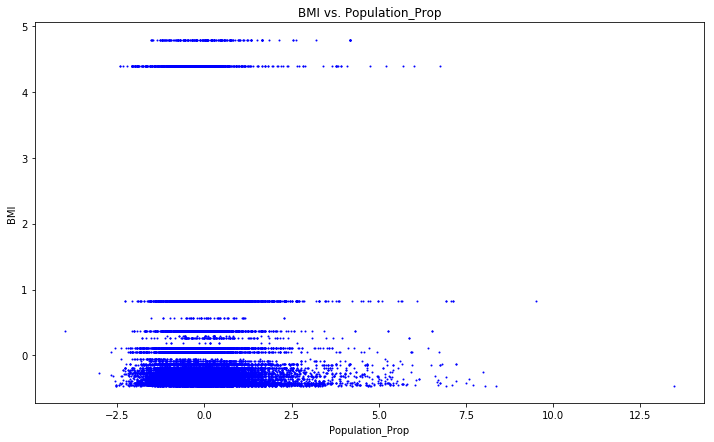

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,7))
plt.plot(X_BMI_Pop.iloc[:, 2], X_BMI_Pop.iloc[:, 3], 'b.', markersize = 2)
plt.title('BMI vs. Population_Prop')
plt.xlabel('Population_Prop')
plt.ylabel('BMI')
plt.show()

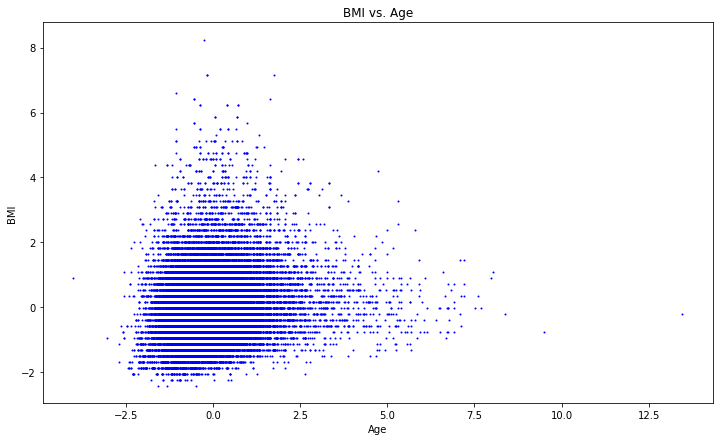

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,7))
plt.plot(X_BMI_Age.iloc[:, 2], X_BMI_Age.iloc[:, 3], 'b.', markersize = 2)
plt.title('BMI vs. Age')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

In [25]:
X_BMI_Pop = X_BMI_Pop.drop(['BMI', 'Population_Prop'], axis = 1)
X_BMI_Age = X_BMI_Age.drop(['BMI', 'Age'], axis = 1)

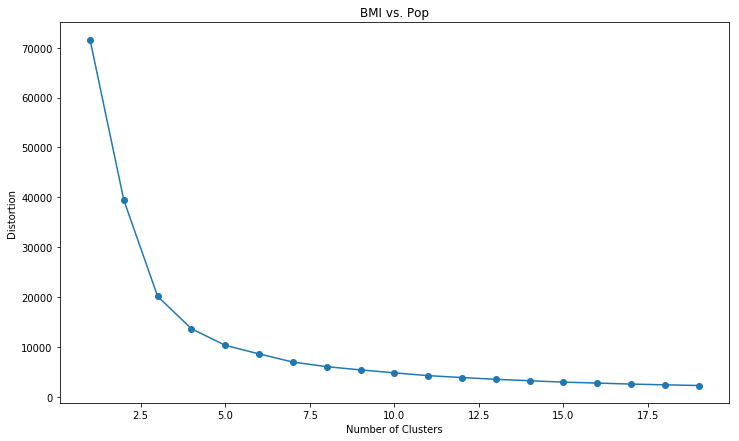

CPU times: user 49.9 s, sys: 5.05 s, total: 54.9 s
Wall time: 14.1 s


In [26]:
%%time

from sklearn.cluster import KMeans
distortions = []
for i in range(1, 20):
    km = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    km.fit(X_BMI_Pop)
    distortions.append(km.inertia_)
    
plt.figure(figsize = (12,7))
plt.plot(range(1, 20), distortions, marker = 'o')
plt.title('BMI vs. Pop')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

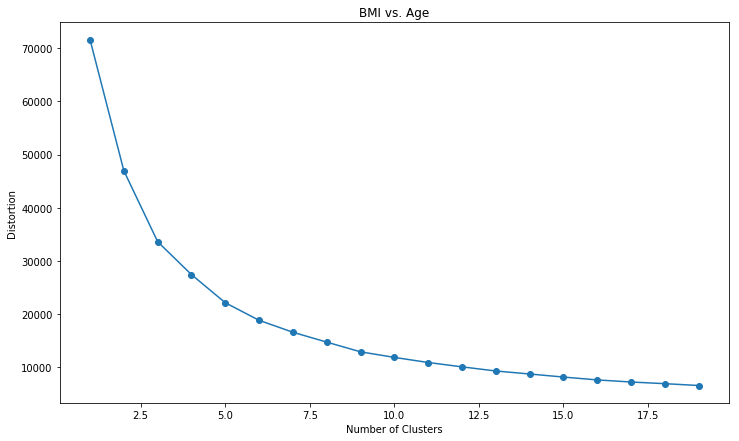

CPU times: user 1min 26s, sys: 8.15 s, total: 1min 34s
Wall time: 26.6 s


In [27]:
%%time

from sklearn.cluster import KMeans
distortions = []
for i in range(1, 20):
    km = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    km.fit(X_BMI_Age)
    distortions.append(km.inertia_)
    
plt.figure(figsize = (12,7))
plt.plot(range(1, 20), distortions, marker = 'o')
plt.title('BMI vs. Age')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

In [28]:
X_new_Age_Pop = X.drop(['BMI', 'Age', 'Population_Prop'], axis = 1)
#Re-Standardize X
sc = StandardScaler()
sc.fit(X_new_Age_Pop)
X_std_new_Age_Pop = sc.transform(X_new_Age_Pop)

In [29]:
%%time
from sklearn.model_selection import StratifiedKFold, cross_val_score
    
params = []
for n_Age in range(5, 12):
    for n_Pop in range(4, 12):
        cls_BMI_Age = KMeans(n_clusters=n_Age, init='k-means++',random_state=0, n_jobs = -1)
        cls_BMI_Age.fit(X_BMI_Age)
        newfeature_BMI_Age = cls_BMI_Age.labels_ # the labels from kmeans clustering
        
        cls_BMI_Pop = KMeans(n_clusters=n_Pop, init='k-means++',random_state=0, n_jobs = -1)
        cls_BMI_Pop.fit(X_BMI_Pop)
        newfeature_BMI_Pop = cls_BMI_Pop.labels_ # the labels from kmeans clustering
        
        X_km = np.column_stack((X_std_new_Age_Pop,pd.get_dummies(newfeature_BMI_Age),
                                pd.get_dummies(newfeature_BMI_Pop)))
        
        acc = cross_val_score(rf_clf, X=X_km, y=y_enc, cv=cv)
        params.append((n_Age, n_Pop, acc.mean()*100,acc.std()*100)) # save state
        print(n_Age, "Age Clusters", n_Pop, "Population Clusters average accuracy = ", 
              acc.mean()*100, "+/-", acc.std()*100)

5 Age Clusters 4 Population Clusters average accuracy =  27.179558782462998 +/- 0.38846096568492156
5 Age Clusters 5 Population Clusters average accuracy =  27.22423903937448 +/- 0.4509632442530923
5 Age Clusters 6 Population Clusters average accuracy =  27.158614912035738 +/- 0.3979433362991695
5 Age Clusters 7 Population Clusters average accuracy =  27.240994135716278 +/- 0.2775007946712059
5 Age Clusters 8 Population Clusters average accuracy =  27.303825746998044 +/- 0.37762262377084366
5 Age Clusters 9 Population Clusters average accuracy =  27.14185981569394 +/- 0.40986535487463804
5 Age Clusters 10 Population Clusters average accuracy =  27.028762915386768 +/- 0.36718135159136195
5 Age Clusters 11 Population Clusters average accuracy =  27.134878525551525 +/- 0.4301381293232461
6 Age Clusters 4 Population Clusters average accuracy =  27.535604579726336 +/- 0.3014397881740832
6 Age Clusters 5 Population Clusters average accuracy =  27.39877129293493 +/- 0.302447022264814
6 Age Cl

In [30]:
X_new = X.drop(['BMI', 'Age'], axis = 1)
#Re-Standardize X
sc = StandardScaler()
sc.fit(X_new)
X_std_new = sc.transform(X_new)

In [31]:
%%time
from sklearn.model_selection import StratifiedKFold, cross_val_score
    
params = []
for n_Age in range(5, 15):
    cls_BMI_Age = KMeans(n_clusters=n_Age, init='k-means++',random_state=0, n_jobs = -1)
    cls_BMI_Age.fit(X_BMI_Age)
    newfeature_BMI_Age = cls_BMI_Age.labels_ # the labels from kmeans clustering
    
    X_km = np.column_stack((X_std_new,pd.get_dummies(newfeature_BMI_Age)))
    
    acc = cross_val_score(rf_clf, X=X_km, y=y_enc, cv=cv)
    params.append((n_Age,acc.mean()*100,acc.std()*100)) # save state
    print(n_Age, "Age Clusters average accuracy = ", 
              acc.mean()*100, "+/-", acc.std()*100)

5 Age Clusters average accuracy =  35.38117844177604 +/- 0.3896535656533182
6 Age Clusters average accuracy =  35.233175090756774 +/- 0.415897433074901
7 Age Clusters average accuracy =  36.327841385087964 +/- 0.33735165877666473
8 Age Clusters average accuracy =  35.7176766266406 +/- 0.2964180488971514
9 Age Clusters average accuracy =  35.86428371963139 +/- 0.3506915445760235
10 Age Clusters average accuracy =  35.65484501535884 +/- 0.5572521592740816
11 Age Clusters average accuracy =  35.55291817927954 +/- 0.4751402678833394
12 Age Clusters average accuracy =  35.74699804523876 +/- 0.40869118860190257
13 Age Clusters average accuracy =  35.31136554035186 +/- 0.48797170606943563
14 Age Clusters average accuracy =  34.89388438983524 +/- 0.44093687056523023
CPU times: user 34min 49s, sys: 3min 3s, total: 37min 53s
Wall time: 38min


In [32]:
%%time 

from sklearn.cluster import AgglomerativeClustering
links = ['ward', 'average', 'complete']

params = []
for link in links:
    for n_clust in range(5, 12):
        agg = AgglomerativeClustering(n_clusters=n_clust, linkage=link)
        agg.fit(X_BMI_Age)
        newfeature_agg = agg.labels_ # the labels from kmeans clustering
        
        X_agg = np.column_stack((X_std_new,pd.get_dummies(newfeature_agg)))
        
        acc = cross_val_score(rf_clf,X=X_agg,y=y_enc,cv=cv)
        params.append((n_clust, link, acc.mean()*100,acc.std()*100)) # save state
        print (link, "Linkage", n_clust, "Cluster Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

ward Linkage 5 Cluster Average accuracy =  35.84473610723261 +- 0.37355056316803203
ward Linkage 6 Cluster Average accuracy =  35.409103602345716 +- 0.3370741553087171
ward Linkage 7 Cluster Average accuracy =  36.00111700642278 +- 0.3696894717752934
ward Linkage 8 Cluster Average accuracy =  35.840547333147164 +- 0.36583292629290737
ward Linkage 9 Cluster Average accuracy =  35.76794191566602 +- 0.3235012641333618
ward Linkage 10 Cluster Average accuracy =  35.756771851438145 +- 0.25490410238378025
ward Linkage 11 Cluster Average accuracy =  35.684166433956996 +- 0.2624853687619096
average Linkage 5 Cluster Average accuracy =  34.983244903658196 +- 0.3751363631544605
average Linkage 6 Cluster Average accuracy =  34.72493716838872 +- 0.31083601472983863
average Linkage 7 Cluster Average accuracy =  34.98603741971517 +- 0.37977448371713546
average Linkage 8 Cluster Average accuracy =  34.97067858140184 +- 0.40066523692786316
average Linkage 9 Cluster Average accuracy =  34.7165596202178

In [33]:
%%time 

from sklearn.cluster import DBSCAN

params = []
for eps in [0.15, 0.17]:
    for mpts in range(10,20):
        
        # append on the clustering
        db = DBSCAN(eps=eps, min_samples=mpts, n_jobs = -1)
        db.fit(X_BMI_Age)
        newfeature_db = db.labels_ # the labels from kmeans clustering

        X_db = np.column_stack((X_std_new,pd.get_dummies(newfeature_db)))

        acc = cross_val_score(rf_clf,X=X_db,y=y_enc,cv=cv)
        params.append((eps, mpts, acc.mean()*100,acc.std()*100)) # save state

        print (eps,mpts,"Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

0.15 10 Average accuracy =  31.39067299636973 +- 0.4978124942779864
0.15 11 Average accuracy =  31.93381736944988 +- 0.41782656980621596
0.15 12 Average accuracy =  31.9575537559341 +- 0.5017134166269432
0.15 13 Average accuracy =  32.317788327282884 +- 0.4140181706792683
0.15 14 Average accuracy =  32.57609606255236 +- 0.36891081886991856
0.15 15 Average accuracy =  32.137671041608485 +- 0.25000817817177773
0.15 16 Average accuracy =  32.38760122870706 +- 0.39056309670248046
0.15 17 Average accuracy =  32.451829098017306 +- 0.37480101487931533
0.15 18 Average accuracy =  32.41692264730523 +- 0.4001223381004265
0.15 19 Average accuracy =  32.236805361630836 +- 0.33769821743269496
0.17 10 Average accuracy =  31.746718793633065 +- 0.4628779633119637
0.17 11 Average accuracy =  32.00223401284558 +- 0.45915452211085056
0.17 12 Average accuracy =  31.996648980731635 +- 0.4861384684497887
0.17 13 Average accuracy =  32.02317788327282 +- 0.47358676563411284
0.17 14 Average accuracy =  32.4476

In [39]:
%%time

from sklearn.cluster import SpectralClustering
from sklearn.neighbors import kneighbors_graph
import warnings
warnings.filterwarnings('ignore')

params = []
for neighbor in range(3, 8):
    for nclust in range(3, 8):
        Xknn = kneighbors_graph(X_BMI_Age, n_neighbors = neighbor, mode='connectivity') 
        spc = SpectralClustering(n_clusters=nclust, affinity = 'nearest_neighbors', n_jobs = -1)
        labels = spc.fit_predict(Xknn) 
        
        X_spc = np.column_stack((X_std_new,pd.get_dummies(labels)))
        acc = cross_val_score(rf_clf,X=X_spc,y=y_enc,cv=cv)
        params.append((neighbor, nclust, acc.mean()*100,acc.std()*100)) # save state
        print (neighbor, nclust, "Cluster Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

3 3 Cluster Average accuracy =  34.69980452387601 +- 0.3167259844458604
3 4 Cluster Average accuracy =  34.59229265568277 +- 0.3001954761239879
3 5 Cluster Average accuracy =  34.54761239877129 +- 0.2823791629256306
3 6 Cluster Average accuracy =  34.1371125383971 +- 0.2210722281741697
3 7 Cluster Average accuracy =  34.27953085730243 +- 0.2970093875263434
4 3 Cluster Average accuracy =  34.705389555989946 +- 0.312786730565671
4 4 Cluster Average accuracy =  34.62859536442334 +- 0.2780236896003372
4 5 Cluster Average accuracy =  34.134320022340134 +- 0.25380038397377097
4 6 Cluster Average accuracy =  33.76710416084892 +- 0.3223632929508715
4 7 Cluster Average accuracy =  34.001675509634175 +- 0.3062105593269543
5 3 Cluster Average accuracy =  33.94163641440938 +- 0.2876732071793944
5 4 Cluster Average accuracy =  33.47947500698129 +- 0.4682275884990226
5 5 Cluster Average accuracy =  33.492041329237644 +- 0.3780766647181849
5 6 Cluster Average accuracy =  33.205808433398495 +- 0.27881

In [43]:
%%time

import itertools
from scipy import linalg
import matplotlib as mpl
from sklearn import mixture

params = []
lowest_bic = np.infty
bic = []
n_components_range = range(1, 15)
cv_types = ['spherical', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a mixture of Gaussians with EM
        gmm = mixture.GaussianMixture(n_components=n_components, covariance_type=cv_type)
        gmm.fit(X_BMI_Age)
        bic.append(gmm.bic(X_BMI_Age))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
        
        labels = gmm.predict(X_BMI_Age) 
        
        X_gmm = np.column_stack((X_std_new,pd.get_dummies(labels)))
        acc = cross_val_score(rf_clf,X=X_gmm,y=y_enc,cv=cv)
        params.append((cv_type, n_components, acc.mean()*100,acc.std()*100)) # save state
        print ("Covariance", cv_type, n_components, "Cluster Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

Covariance spherical 1 Cluster Average accuracy =  35.012566322256355 +- 0.3134093905969992
Covariance spherical 2 Cluster Average accuracy =  35.49846411616866 +- 0.2956772125198703
Covariance spherical 3 Cluster Average accuracy =  35.78050823792237 +- 0.4314053206993165
Covariance spherical 4 Cluster Average accuracy =  35.568277017592855 +- 0.31340939059700007
Covariance spherical 5 Cluster Average accuracy =  35.43423624685841 +- 0.23767576465739537
Covariance spherical 6 Cluster Average accuracy =  35.15079586707623 +- 0.36635479949159216
Covariance spherical 7 Cluster Average accuracy =  35.86986875174533 +- 0.4802802895837745
Covariance spherical 8 Cluster Average accuracy =  35.847528623289584 +- 0.5227005268297861
Covariance spherical 9 Cluster Average accuracy =  35.758168109466624 +- 0.45974856757779425
Covariance spherical 10 Cluster Average accuracy =  35.44121753700084 +- 0.4703980657436947
Covariance spherical 11 Cluster Average accuracy =  35.347668249092436 +- 0.48881

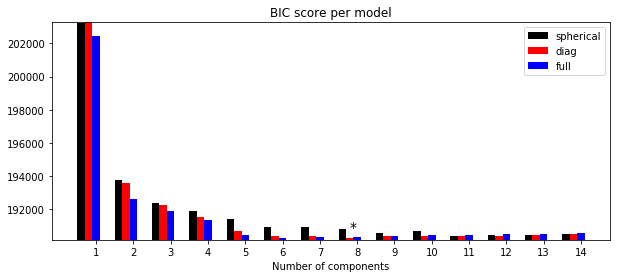

In [36]:
# this code has been manipulated from the source available on sklearn's website documentation
# plot the BIC
bic = np.array(bic)
color_iter = itertools.cycle(['k', 'r', 'b', 'g', 'c', 'm', 'y'])
clf = best_gmm
bars = []

plt.figure(figsize=(10,4))
spl = plt.subplot(1,1,1)
# Plot the BIC scores
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')

xpos = np.min(n_components_range)-0.4 + np.mod(bic.argmin(), len(n_components_range)) +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

plt.show()

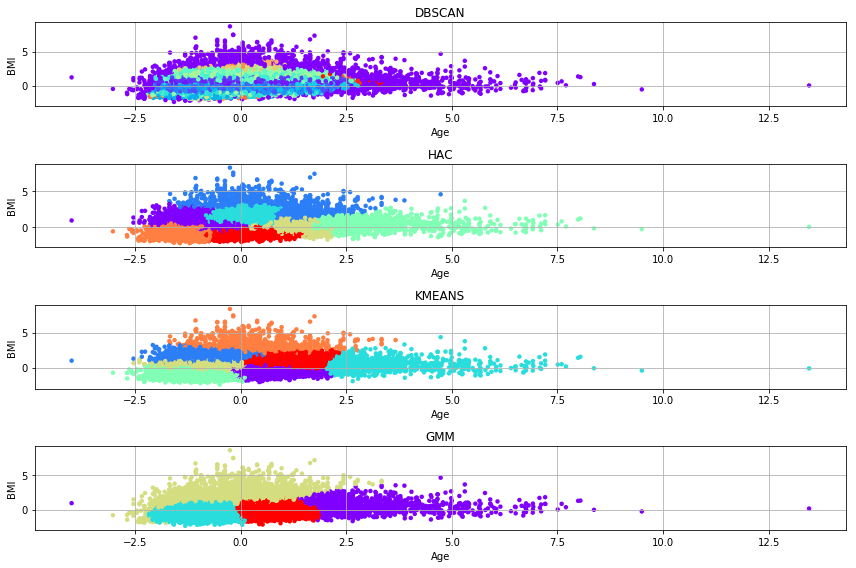

In [44]:
from matplotlib import cm
data = X_BMI_Age

cls = DBSCAN(eps=0.17, min_samples=17)
cls.fit(data)
dbs_labels = cls.labels_ 

cls = AgglomerativeClustering(n_clusters=7, linkage='ward')
cls.fit(data)
hac_labels = cls.labels_ 

cls = KMeans(n_clusters=7, random_state=0)
cls.fit(data)
km_labels = cls.labels_

cls = mixture.GaussianMixture(n_components=4, covariance_type='full')
cls.fit(data)
gmm_labels = cls.predict(data)

fig = plt.figure(figsize=(12,8))
title = ['DBSCAN','HAC','KMEANS', 'GMM']

for i,l in enumerate([dbs_labels,hac_labels,km_labels, gmm_labels]):
    
    plt.subplot(4,1,1*i+1)
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1]+np.random.random(data.iloc[:, 1].shape)/2, c=l, cmap=plt.cm.rainbow, s=20, linewidths=0)
    plt.xlabel('Age'), plt.ylabel('BMI')
    plt.grid()
    plt.title(title[i])
    
    
plt.tight_layout()
plt.show()

## Deployment 
---
- Be critical of your performance and tell the reader how you current model might be usable by other parties. Did you achieve your goals? If not, can you reign in the utility of your modeling?  How useful is your model for interested parties (i.e., the companies or organizations that might want to use it)?  How would your deploy your model for interested parties?  What other data should be collected?  How often would the model need to be updated, etc.? (10 pts)

## Exceptional Work 
---
- You have free reign to provide additional analyses or combine analyses. (10 pts)